<a href="https://colab.research.google.com/github/MarianaDuartee/ProjetoFinal/blob/main/1_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fsspec

In [ ]:
pip install gcsfs

#Importando a Biblioteca Pandas

In [3]:
import pandas as pd
import fsspec
import gcsfs

#Evolução de Investimentos - CSV

* Importando o arquivo das Despesas com Segurança Pública de cada Estado, diretamente do CloudStorage utilizando a chave de acesso.

In [ ]:
import os
from google.cloud import storage
serviceaccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = serviceaccount

df = pd.read_csv('gs://data_lake_ingest_data/1_input/EvolucaoDespesas_FREE.csv',sep=',')
df
    


,Regiões e UF,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Variação (em %)
0,Norte,"6.394.328.586,52","6.623.979.659,28","6.849.729.109,70","7.552.627.990,70","7.838.121.166,47","7.254.021.574,77","7.462.104.173,60","8.130.774.315,04","8.612.203.043,49","8.763.954.594,78","37,1"
1,Acre,"454.915.616,43","532.164.696,28","549.175.240,01","616.709.951,61","534.921.056,93","498.534.695,86","568.361.392,44","627.350.849,50","692.570.200,34","493.753.295,05","8,5"
2,Amapá,"493.902.125,45","59.402.949,28","75.515.866,10","82.495.040,58","581.273.537,05","475.323.291,75","500.226.894,86","489.227.978,64","606.366.325,29","752.252.498,84","52,3"
3,Amazonas,"1.310.339.510,65","1.593.403.245,27","1.606.650.796,99","1.861.072.542,90","1.697.488.495,12","1.604.732.215,63","1.578.956.656,67","1.862.668.906,56","2.108.459.954,54","2.101.446.656,49","60,4"
4,Pará,"1.877.141.957,50","2.181.270.638,40","2.307.281.116,81","2.579.506.641,84","2.652.664.735,08","2.551.740.769,92","2.579.915.982,34","2.903.200.194,44","2.943.447.535,92","2.966.553.398,06","58,0"
5,Rondônia,"1.171.454.453,24","1.188.532.359,46","1.194.371.332,46","1.277.796.554,32","1.207.414.018,69","874.874.024,27","895.867.664,43","903.253.857,47","853.970.999,52","999.043.935,87","-14,7"
6,Roraima,"235.883.558,36","224.651.722,68","264.991.258,70","335.150.148,03","373.484.246,43","408.934.196,87","440.123.923,17","405.445.804,72","288.197.942,22","391.178.398,82","65,8"
7,Tocantins,"850.691.364,90","844.554.047,92","851.743.498,64","799.897.111,42","790.875.077,17","839.882.380,46","898.651.659,69","939.626.723,71","1.119.190.085,67","1.059.726.411,65","24,6"
8,Alagoas,"1.156.902.298,83","1.225.743.016,63","1.436.512.112,81","1.458.842.832,72","1.320.650.899,28","1.196.640.762,20","1.244.519.570,97","1.251.228.766,11","1.159.158.819,29","1.354.986.271,10","17,1"
9,Bahia,"4.159.170.807,43","4.684.426.051,49","4.187.259.055,74","4.705.640.833,78","4.641.372.196,49","4.760.591.103,41","4.569.076.407,13","4.601.027.227,73","4.682.403.355,77","4.321.663.327,23","3,9"


* Verificando as 5 primeiras linhas do dataframe importado

In [ ]:
df.head()

,Regiões e UF,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Variação (em %)
0,Norte,"6.394.328.586,52","6.623.979.659,28","6.849.729.109,70","7.552.627.990,70","7.838.121.166,47","7.254.021.574,77","7.462.104.173,60","8.130.774.315,04","8.612.203.043,49","8.763.954.594,78","37,1"
1,Acre,"454.915.616,43","532.164.696,28","549.175.240,01","616.709.951,61","534.921.056,93","498.534.695,86","568.361.392,44","627.350.849,50","692.570.200,34","493.753.295,05","8,5"
2,Amapá,"493.902.125,45","59.402.949,28","75.515.866,10","82.495.040,58","581.273.537,05","475.323.291,75","500.226.894,86","489.227.978,64","606.366.325,29","752.252.498,84","52,3"
3,Amazonas,"1.310.339.510,65","1.593.403.245,27","1.606.650.796,99","1.861.072.542,90","1.697.488.495,12","1.604.732.215,63","1.578.956.656,67","1.862.668.906,56","2.108.459.954,54","2.101.446.656,49","60,4"
4,Pará,"1.877.141.957,50","2.181.270.638,40","2.307.281.116,81","2.579.506.641,84","2.652.664.735,08","2.551.740.769,92","2.579.915.982,34","2.903.200.194,44","2.943.447.535,92","2.966.553.398,06","58,0"


* Verificando os tipos de dados de cada coluna

In [ ]:
df.dtypes

Regiões e UF       object
2011               object
2012               object
2013               object
2014               object
2015               object
2016               object
2017               object
2018               object
2019               object
2020               object
Variação (em %)    object
dtype: object

* Backup do DataFrame de Despesas pois iremos realizar alterações

In [ ]:
df_back = df.copy()
df_back.head()

,Regiões e UF,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Variação (em %)
0,Norte,"6.394.328.586,52","6.623.979.659,28","6.849.729.109,70","7.552.627.990,70","7.838.121.166,47","7.254.021.574,77","7.462.104.173,60","8.130.774.315,04","8.612.203.043,49","8.763.954.594,78","37,1"
1,Acre,"454.915.616,43","532.164.696,28","549.175.240,01","616.709.951,61","534.921.056,93","498.534.695,86","568.361.392,44","627.350.849,50","692.570.200,34","493.753.295,05","8,5"
2,Amapá,"493.902.125,45","59.402.949,28","75.515.866,10","82.495.040,58","581.273.537,05","475.323.291,75","500.226.894,86","489.227.978,64","606.366.325,29","752.252.498,84","52,3"
3,Amazonas,"1.310.339.510,65","1.593.403.245,27","1.606.650.796,99","1.861.072.542,90","1.697.488.495,12","1.604.732.215,63","1.578.956.656,67","1.862.668.906,56","2.108.459.954,54","2.101.446.656,49","60,4"
4,Pará,"1.877.141.957,50","2.181.270.638,40","2.307.281.116,81","2.579.506.641,84","2.652.664.735,08","2.551.740.769,92","2.579.915.982,34","2.903.200.194,44","2.943.447.535,92","2.966.553.398,06","58,0"


* Verificamos que as colunas de Despesas vieram como String devido á virgula presente, logo, realizamos a troca da virgula pelo ponto atraves da função abaixo

In [ ]:
def alterar_numeros(col):
  novo = []
  for row in col:
    row = row.replace(".","")
    row = row.replace(",",".")
    novo.append(row)
  return novo

In [ ]:
ano_val = 2011
for i in range(10):
  ano_str = str(ano_val)
  df[ano_str] = alterar_numeros(df[ano_str])
  ano_val = ano_val + 1
  #print(ano_str)

* Verificamos também, que a coluna de Variação das Despesas ao longo dos anos estava como String também, logo, realizamos o mesmo processo de troca da virgula pelo ponto

In [ ]:
def alterar_variacao(col):
  novo = []
  for row in col:
    row = row.replace(",",".")
    novo.append(row)
  return novo

df['Variação (em %)'] = alterar_variacao(df['Variação (em %)'])


In [ ]:
df.head()

,Regiões e UF,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Variação (em %)
0,Norte,6394328586.52,6623979659.28,6849729109.70,7552627990.70,7838121166.47,7254021574.77,7462104173.60,8130774315.04,8612203043.49,8763954594.78,37.1
1,Acre,454915616.43,532164696.28,549175240.01,616709951.61,534921056.93,498534695.86,568361392.44,627350849.50,692570200.34,493753295.05,8.5
2,Amapá,493902125.45,59402949.28,75515866.10,82495040.58,581273537.05,475323291.75,500226894.86,489227978.64,606366325.29,752252498.84,52.3
3,Amazonas,1310339510.65,1593403245.27,1606650796.99,1861072542.90,1697488495.12,1604732215.63,1578956656.67,1862668906.56,2108459954.54,2101446656.49,60.4
4,Pará,1877141957.50,2181270638.40,2307281116.81,2579506641.84,2652664735.08,2551740769.92,2579915982.34,2903200194.44,2943447535.92,2966553398.06,58.0


* Depois da troca, realizamos a conversão das colunas que estavam como string para número (float)

In [ ]:
df['2011'] = pd.to_numeric(df['2011'])
df['2012'] = pd.to_numeric(df['2012'])
df['2013'] = pd.to_numeric(df['2013'])
df['2014'] = pd.to_numeric(df['2014'])
df['2015'] = pd.to_numeric(df['2015'])
df['2016'] = pd.to_numeric(df['2016'])
df['2017'] = pd.to_numeric(df['2017'])
df['2018'] = pd.to_numeric(df['2018'])
df['2019'] = pd.to_numeric(df['2019'])
df['2020'] = pd.to_numeric(df['2020'])


In [ ]:
df['Variação (em %)'] = pd.to_numeric(df['Variação (em %)'])

* Analisando se a conversão foi feita corretamente

In [ ]:
df.dtypes

Regiões e UF        object
2011               float64
2012               float64
2013               float64
2014               float64
2015               float64
2016               float64
2017               float64
2018               float64
2019               float64
2020               float64
Variação (em %)    float64
dtype: object

In [ ]:
df.head()

,Regiões e UF,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Variação (em %)
0,Norte,6.394329e+09,6.623980e+09,6.849729e+09,7.552628e+09,7.838121e+09,7.254022e+09,7.462104e+09,8.130774e+09,8.612203e+09,8.763955e+09,37.1
1,Acre,4.549156e+08,5.321647e+08,5.491752e+08,6.167100e+08,5.349211e+08,4.985347e+08,5.683614e+08,6.273508e+08,6.925702e+08,4.937533e+08,8.5
2,Amapá,4.939021e+08,5.940295e+07,7.551587e+07,8.249504e+07,5.812735e+08,4.753233e+08,5.002269e+08,4.892280e+08,6.063663e+08,7.522525e+08,52.3
3,Amazonas,1.310340e+09,1.593403e+09,1.606651e+09,1.861073e+09,1.697488e+09,1.604732e+09,1.578957e+09,1.862669e+09,2.108460e+09,2.101447e+09,60.4
4,Pará,1.877142e+09,2.181271e+09,2.307281e+09,2.579507e+09,2.652665e+09,2.551741e+09,2.579916e+09,2.903200e+09,2.943448e+09,2.966553e+09,58.0


* Formatar dados para números por milhão, pois como os números são muito grandes estavam com e+09 ou e+08

In [ ]:
def por_milhao(col):
  novo = []
  for row in col:
    row = row/1000000
    row = round(row,3)
    novo.append(row)
  return novo

In [ ]:
ano_val = 2011
for i in range(10):
  ano_str = str(ano_val)
  df[ano_str] = por_milhao(df[ano_str])
  ano_val = ano_val + 1
  #print(ano_str)

* Verificando se a formatação foi realizada corretamente

In [ ]:
df.head()

,Regiões e UF,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Variação (em %)
0,Norte,6.394329e+09,6.623980e+09,6.849729e+09,7.552628e+09,7.838121e+09,7.254022e+09,7.462104e+09,8.130774e+09,8.612203e+09,8.763955e+09,37.1
1,Acre,4.549156e+08,5.321647e+08,5.491752e+08,6.167100e+08,5.349211e+08,4.985347e+08,5.683614e+08,6.273508e+08,6.925702e+08,4.937533e+08,8.5
2,Amapá,4.939021e+08,5.940295e+07,7.551587e+07,8.249504e+07,5.812735e+08,4.753233e+08,5.002269e+08,4.892280e+08,6.063663e+08,7.522525e+08,52.3
3,Amazonas,1.310340e+09,1.593403e+09,1.606651e+09,1.861073e+09,1.697488e+09,1.604732e+09,1.578957e+09,1.862669e+09,2.108460e+09,2.101447e+09,60.4
4,Pará,1.877142e+09,2.181271e+09,2.307281e+09,2.579507e+09,2.652665e+09,2.551741e+09,2.579916e+09,2.903200e+09,2.943448e+09,2.966553e+09,58.0


* Renomeando o nome das colunas 

In [ ]:
df.rename(columns={'Regiões e UF': 'UF','Variação (em %)':'Variacao%'},inplace=True)

In [ ]:
df.rename(columns={'2011': 'Despesas2011', '2012': 'Despesas2012',
                   '2013': 'Despesas2013', '2014': 'Despesas2014',
                   '2015': 'Despesas2015', '2016': 'Despesas2016',
                   '2017': 'Despesas2017', '2018': 'Despesas2018',
                   '2019': 'Despesas2019', '2020': 'Despesas2020'},inplace=True)

In [ ]:
df.head()

,UF,Despesas2011,Despesas2012,Despesas2013,Despesas2014,Despesas2015,Despesas2016,Despesas2017,Despesas2018,Despesas2019,Despesas2020,Variacao%
0,Norte,6.394329e+09,6.623980e+09,6.849729e+09,7.552628e+09,7.838121e+09,7.254022e+09,7.462104e+09,8.130774e+09,8.612203e+09,8.763955e+09,37.1
1,Acre,4.549156e+08,5.321647e+08,5.491752e+08,6.167100e+08,5.349211e+08,4.985347e+08,5.683614e+08,6.273508e+08,6.925702e+08,4.937533e+08,8.5
2,Amapá,4.939021e+08,5.940295e+07,7.551587e+07,8.249504e+07,5.812735e+08,4.753233e+08,5.002269e+08,4.892280e+08,6.063663e+08,7.522525e+08,52.3
3,Amazonas,1.310340e+09,1.593403e+09,1.606651e+09,1.861073e+09,1.697488e+09,1.604732e+09,1.578957e+09,1.862669e+09,2.108460e+09,2.101447e+09,60.4
4,Pará,1.877142e+09,2.181271e+09,2.307281e+09,2.579507e+09,2.652665e+09,2.551741e+09,2.579916e+09,2.903200e+09,2.943448e+09,2.966553e+09,58.0


* Excluindo as colunas de 2011 a 2015, afim de realizamos a analise com base nos anos a partir de 2016

In [ ]:
df.drop(columns=["Despesas2011", "Despesas2012","Despesas2013","Despesas2014","Despesas2015"],inplace=True)
df

,UF,Despesas2016,Despesas2017,Despesas2018,Despesas2019,Despesas2020,Variacao%
0,Norte,7.254022e+09,7.462104e+09,8.130774e+09,8.612203e+09,8.763955e+09,37.1
1,Acre,4.985347e+08,5.683614e+08,6.273508e+08,6.925702e+08,4.937533e+08,8.5
2,Amapá,4.753233e+08,5.002269e+08,4.892280e+08,6.063663e+08,7.522525e+08,52.3
3,Amazonas,1.604732e+09,1.578957e+09,1.862669e+09,2.108460e+09,2.101447e+09,60.4
4,Pará,2.551741e+09,2.579916e+09,2.903200e+09,2.943448e+09,2.966553e+09,58.0
5,Rondônia,8.748740e+08,8.958677e+08,9.032539e+08,8.539710e+08,9.990439e+08,-14.7
6,Roraima,4.089342e+08,4.401239e+08,4.054458e+08,2.881979e+08,3.911784e+08,65.8
7,Tocantins,8.398824e+08,8.986517e+08,9.396267e+08,1.119190e+09,1.059726e+09,24.6
8,Alagoas,1.196641e+09,1.244520e+09,1.251229e+09,1.159159e+09,1.354986e+09,17.1
9,Bahia,4.760591e+09,4.569076e+09,4.601027e+09,4.682403e+09,4.321663e+09,3.9


* Verificando se há numeros nulos ou notAvalaible na tabela

In [ ]:
df.isnull().sum()

UF              0
Despesas2016    0
Despesas2017    0
Despesas2018    0
Despesas2019    0
Despesas2020    0
Variacao%       0
dtype: int64

In [ ]:
df.isna().sum()

UF              0
Despesas2016    0
Despesas2017    0
Despesas2018    0
Despesas2019    0
Despesas2020    0
Variacao%       0
dtype: int64

* Verificando os valores unicos de cada coluna, afim de analisar se há inconsistencias 

In [ ]:
pd.unique(df['UF'])

array(['Norte', 'Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia',
       'Roraima', 'Tocantins', 'Alagoas', 'Bahia', 'Ceará', 'Maranhão',
       'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe',
       'Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Distrito Federal',
       'Espírito Santo', 'Minas Gerais', 'São Paulo', 'Rio de Janeiro',
       'Paraná', 'Rio Grande do Sul', 'Santa Catarina'], dtype=object)

In [ ]:
pd.unique(df['Despesas2016'])

array([ 7254.022,   498.535,   475.323,  1604.732,  2551.741,   874.874,
         408.934,   839.882,  1196.641,  4760.591,  2188.315,  1593.472,
        1286.81 ,  2657.598,   804.429,  1215.257,   942.15 ,  3455.91 ,
        2085.541,  1459.525,   812.247,  1503.902, 10200.579, 12623.118,
       10516.68 ,  4378.227,  3830.294,  2504.618])

In [ ]:
pd.unique(df['Despesas2017'])

array([ 7462.104,   568.361,   500.227,  1578.957,  2579.916,   895.868,
         440.124,   898.652,  1244.52 ,  4569.076,  2400.235,  1764.788,
        1295.207,  2807.874,   792.977,   983.317,   938.501,  3084.744,
        2118.651,  1487.222,   909.792,  1515.639, 10184.396, 12833.789,
        9517.644,  4832.395,  4242.065,  2499.203])

In [ ]:
pd.unique(df['Despesas2018'])

array([ 8130.774,   627.351,   489.228,  1862.669,  2903.2  ,   903.254,
         405.446,   939.627,  1251.229,  4601.027,  2763.339,  1980.318,
        1352.972,  2971.232,   799.   ,  1045.736,   956.072,  3643.161,
        2204.075,  1233.864,   905.006,  1575.667,  9905.975, 12259.8  ,
       10222.455,  4159.687,  4835.823,  2484.836])

In [ ]:
pd.unique(df['Despesas2019'])

array([ 8612.203,   692.57 ,   606.366,  2108.46 ,  2943.448,   853.971,
         288.198,  1119.19 ,  1159.159,  4682.403,  2842.36 ,  2003.66 ,
        1386.24 ,  2985.145,   893.296,  1203.684,   989.128,  3839.27 ,
        2486.876,  1259.369,   931.987,  1427.714,  9308.714, 12321.964,
       10035.271,  3986.055,  5038.748,  2396.133])

In [ ]:
pd.unique(df['Despesas2020'])

array([ 8763.955,   493.753,   752.252,  2101.447,  2966.553,   999.044,
         391.178,  1059.726,  1354.986,  4321.663,  3045.583,  1954.384,
        1417.592,  2880.151,   785.832,  1038.218,   956.784,  3191.756,
        2577.01 ,  1240.098,   976.513,  1408.398,  8987.254, 11935.652,
        9450.563,  3687.002,  5530.742,  2406.364])

* Removendo a linha com os valores da Região Norte, pois iremos analisar por estado

In [ ]:
indice = df.loc[df['UF'] == 'Norte'].index
df.drop(indice,axis=0,inplace=True)
df

,UF,Despesas2016,Despesas2017,Despesas2018,Despesas2019,Despesas2020,Variacao%
1,Acre,4.985347e+08,5.683614e+08,6.273508e+08,6.925702e+08,4.937533e+08,8.5
2,Amapá,4.753233e+08,5.002269e+08,4.892280e+08,6.063663e+08,7.522525e+08,52.3
3,Amazonas,1.604732e+09,1.578957e+09,1.862669e+09,2.108460e+09,2.101447e+09,60.4
4,Pará,2.551741e+09,2.579916e+09,2.903200e+09,2.943448e+09,2.966553e+09,58.0
5,Rondônia,8.748740e+08,8.958677e+08,9.032539e+08,8.539710e+08,9.990439e+08,-14.7
6,Roraima,4.089342e+08,4.401239e+08,4.054458e+08,2.881979e+08,3.911784e+08,65.8
7,Tocantins,8.398824e+08,8.986517e+08,9.396267e+08,1.119190e+09,1.059726e+09,24.6
8,Alagoas,1.196641e+09,1.244520e+09,1.251229e+09,1.159159e+09,1.354986e+09,17.1
9,Bahia,4.760591e+09,4.569076e+09,4.601027e+09,4.682403e+09,4.321663e+09,3.9
10,Ceará,2.188315e+09,2.400235e+09,2.763339e+09,2.842360e+09,3.045583e+09,95.0


* Acrescentando uma coluna com a média dos valores presentes nas outras colunas

In [ ]:
col = df.loc[: , "Despesas2016":"Despesas2020"]
df['Previsao2021|Media'] = col.mean(axis=1)
df

,UF,Despesas2016,Despesas2017,Despesas2018,Despesas2019,Despesas2020,Variacao%,Previsao2021|Media
1,Acre,4.985347e+08,5.683614e+08,6.273508e+08,6.925702e+08,4.937533e+08,8.5,5.761141e+08
2,Amapá,4.753233e+08,5.002269e+08,4.892280e+08,6.063663e+08,7.522525e+08,52.3,5.646794e+08
3,Amazonas,1.604732e+09,1.578957e+09,1.862669e+09,2.108460e+09,2.101447e+09,60.4,1.851253e+09
4,Pará,2.551741e+09,2.579916e+09,2.903200e+09,2.943448e+09,2.966553e+09,58.0,2.788972e+09
5,Rondônia,8.748740e+08,8.958677e+08,9.032539e+08,8.539710e+08,9.990439e+08,-14.7,9.054021e+08
6,Roraima,4.089342e+08,4.401239e+08,4.054458e+08,2.881979e+08,3.911784e+08,65.8,3.867761e+08
7,Tocantins,8.398824e+08,8.986517e+08,9.396267e+08,1.119190e+09,1.059726e+09,24.6,9.714155e+08
8,Alagoas,1.196641e+09,1.244520e+09,1.251229e+09,1.159159e+09,1.354986e+09,17.1,1.241307e+09
9,Bahia,4.760591e+09,4.569076e+09,4.601027e+09,4.682403e+09,4.321663e+09,3.9,4.586952e+09
10,Ceará,2.188315e+09,2.400235e+09,2.763339e+09,2.842360e+09,3.045583e+09,95.0,2.647966e+09


* Exportando o DataFrame de Despesas Normalizado para o GloudStorage em formato CSV

In [ ]:
from google.cloud import storage
import os
serviceAccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount


client = storage.Client()
bucket = client.get_bucket('data_lake_ingest_data')
    
bucket.blob('2_temp/temp_pandas_despesas_normalizado_milhao.csv').upload_from_string(df.to_csv(index=False), 'text/csv')

##Visualização com o MatPlotLib

* Importando as bibliotecas que serão utilizadas na plotagem dos graficos

In [ ]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import seaborn as sns

import numpy as np

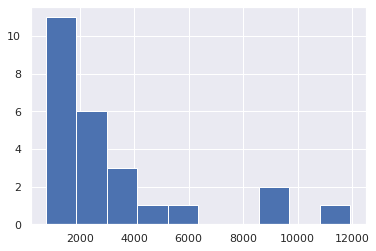

In [ ]:
df[df['Despesas2020'] > 500]['Despesas2020'].hist()

* Filtros realizados para agrupar os Estados em suas respectivas Regiões

In [ ]:
filter_norte = df.UF.isin(['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'])
filter_nordeste = df.UF.isin(['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'])
filter_centroeste = df.UF.isin(['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul'])
filter_sudeste = df.UF.isin(['São Paulo', 'Rio de Janeiro', 'Espírito Santo', 'Minas Gerais'])
filter_sul = df.UF.isin(['Paraná', 'Santa Catarina', 'Rio Grande do Sul'])

* Visualização do DataFrame com a região norte, seus estados e as despesas de cada um em 2020

In [ ]:
df.loc[filter_norte, ['UF','Despesas2020']]

,UF,Despesas2020
1,Acre,493.753
2,Amapá,752.252
3,Amazonas,2101.447
4,Pará,2966.553
5,Rondônia,999.044
6,Roraima,391.178
7,Tocantins,1059.726


* Salvando a visualização dos estados da região norte com suas despesas ao longo dos anos em outro DataFrame

In [ ]:
df_regiao = df.loc[filter_norte]
df_regiao

,UF,Despesas2016,Despesas2017,Despesas2018,Despesas2019,Despesas2020,Variacao%,Previsao2021|Media
1,Acre,498.535,568.361,627.351,692.570,493.753,8.5,576.1140
2,Amapá,475.323,500.227,489.228,606.366,752.252,52.3,564.6792
3,Amazonas,1604.732,1578.957,1862.669,2108.460,2101.447,60.4,1851.2530
4,Pará,2551.741,2579.916,2903.200,2943.448,2966.553,58.0,2788.9716
5,Rondônia,874.874,895.868,903.254,853.971,999.044,-14.7,905.4022
6,Roraima,408.934,440.124,405.446,288.198,391.178,65.8,386.7760
7,Tocantins,839.882,898.652,939.627,1119.190,1059.726,24.6,971.4154


* Salvando as Despesas dos Estados da Região Norte em uma Lista

In [ ]:
list_val = df.loc[filter_norte, ['Despesas2020']]
list_val.values

array([[ 493.753],
       [ 752.252],
       [2101.447],
       [2966.553],
       [ 999.044],
       [ 391.178],
       [1059.726]])

* Visualização das despesas dos estados da região Norte no grafico de barras

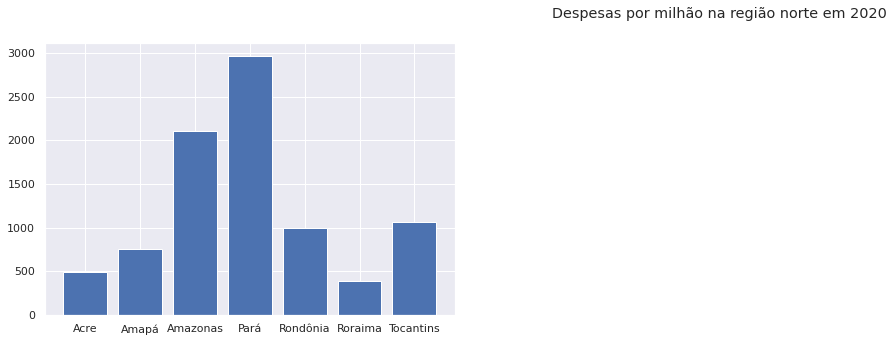

In [ ]:
names = ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins']
values = [493.753,752.252,2101.447,2966.553,999.044,391.178,1059.726]

plt.figure(figsize=(25, 5))

plt.subplot(131)
plt.bar(names, values)

plt.suptitle('Despesas por milhão na região norte em 2020')
plt.show()

In [ ]:
df.loc[filter_nordeste, ['UF','Despesas2020']]

,UF,Despesas2020
8,Alagoas,1354.986
9,Bahia,4321.663
10,Ceará,3045.583
11,Maranhão,1954.384
12,Paraíba,1417.592
13,Pernambuco,2880.151
14,Piauí,785.832
15,Rio Grande do Norte,1038.218
16,Sergipe,956.784




*   Função que retorna o dataframe de acordo com a região especificada relacionando com alguma coluna
*   Função que mostra a visualização do dataframe com o filtro de região aplicado



In [ ]:
def valores_regiao(filtro_regiao, coluna):
  regi_val = df.loc[filtro_regiao, [coluna]]
  regi_val = regi_val.values
  return regi_val[:,0]

def visualizar_regiao(filtro_regiao, coluna_valor):
  names = valores_regiao(filtro_regiao, 'UF')
  values = valores_regiao(filtro_regiao, coluna_valor)

  plt.figure(figsize=(50, 8))

  plt.subplot(131)
  plt.bar(names, values)

  plt.show()

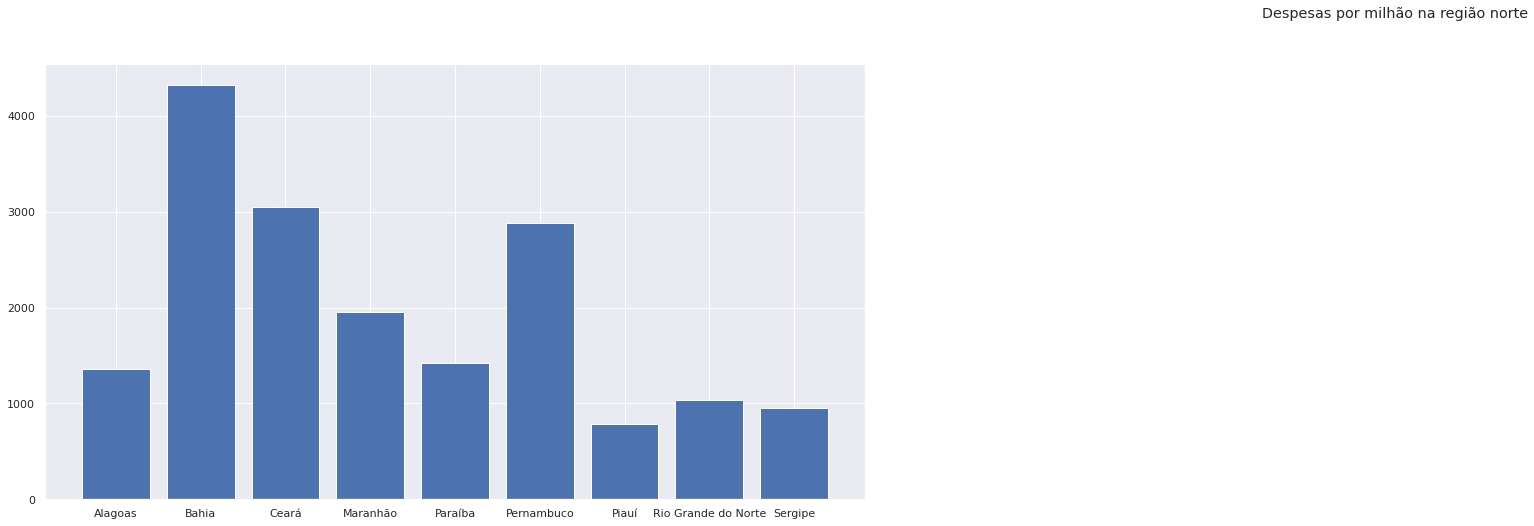

In [ ]:
names = valores_regiao(filter_nordeste, 'UF')
values = valores_regiao(filter_nordeste, 'Despesas2020')

plt.figure(figsize=(50, 8))

plt.subplot(131)
plt.bar(names, values)

plt.suptitle('Despesas por milhão na região norte')
plt.show()

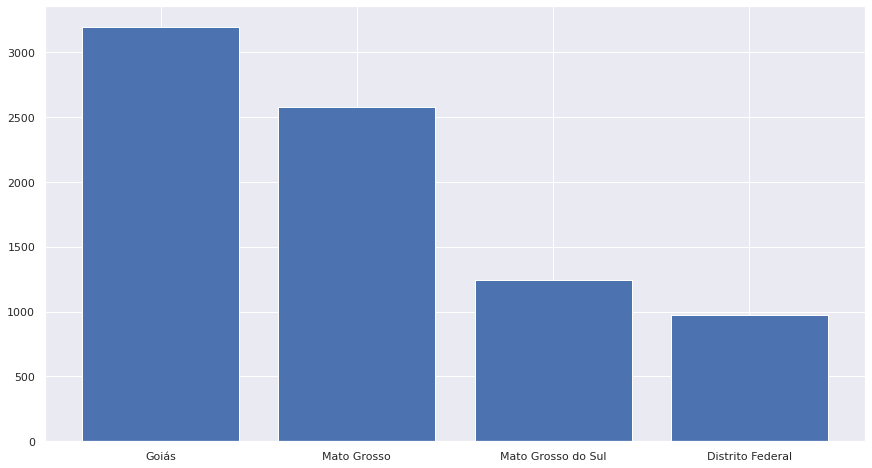

In [ ]:
visualizar_regiao(filter_centroeste, 'Despesas2020')

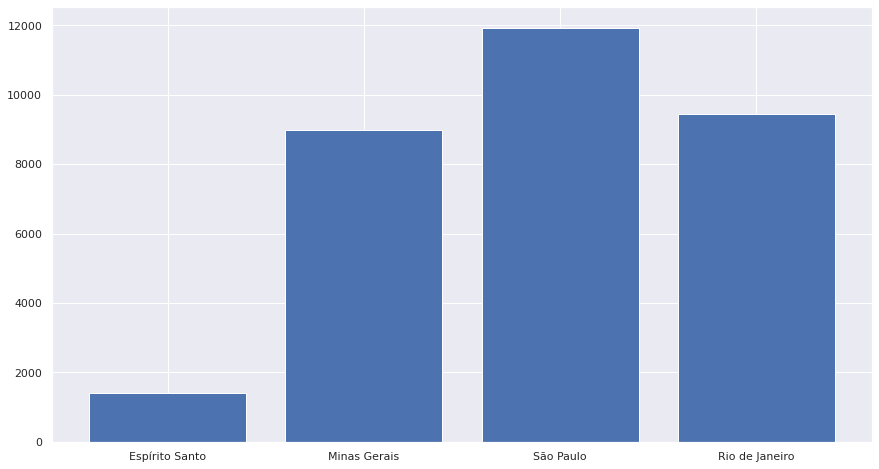

In [ ]:
visualizar_regiao(filter_sudeste, 'Despesas2020')

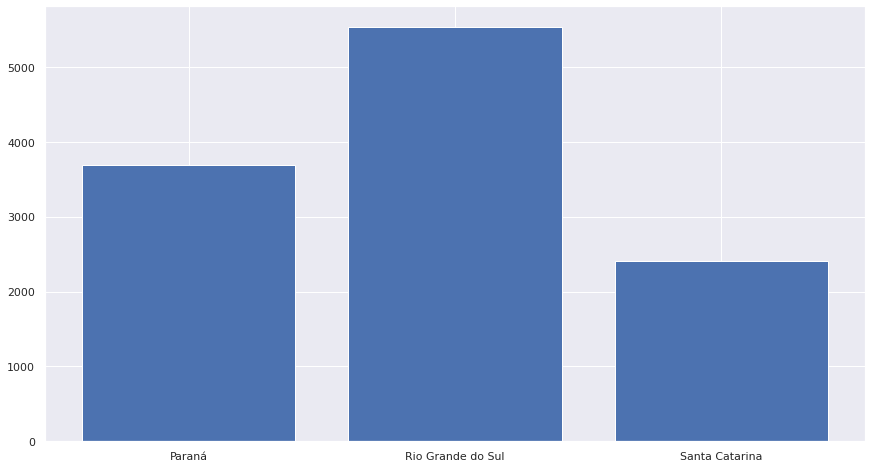

In [ ]:
visualizar_regiao(filter_sul, 'Despesas2020')

#Ocorrências - JSON

* Importando o arquivo das Ocorrencias Criminais realizadas por tipo de Crime e por Estado, diretamente do CloudStorage

In [5]:
import os
from google.cloud import storage
serviceaccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = serviceaccount
df1 = pd.read_json('gs://data_lake_ingest_data/1_input/OcorrenciasUF.json')
df1
   

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2021,janeiro,39
1,Acre,Furto de veículo,2021,janeiro,55
2,Acre,Homicídio doloso,2021,janeiro,14
3,Acre,Lesão corporal seguida de morte,2021,janeiro,0
4,Acre,Roubo a instituição financeira,2021,janeiro,0
...,...,...,...,...,...
18769,Tocantins,Roubo a instituição financeira,2015,dezembro,6
18770,Tocantins,Roubo de carga,2015,dezembro,1
18771,Tocantins,Roubo de veículo,2015,dezembro,55
18772,Tocantins,Roubo seguido de morte (latrocínio),2015,dezembro,2


* Verificando os 5 primeiros dados

In [ ]:
df1.head()

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2021,janeiro,39
1,Acre,Furto de veículo,2021,janeiro,55
2,Acre,Homicídio doloso,2021,janeiro,14
3,Acre,Lesão corporal seguida de morte,2021,janeiro,0
4,Acre,Roubo a instituição financeira,2021,janeiro,0


* Verificando os 5 ultimos dados

In [ ]:
df1.tail()

,UF,Tipo Crime,Ano,Mês,Ocorrências
18769,Tocantins,Roubo a instituição financeira,2015,dezembro,6
18770,Tocantins,Roubo de carga,2015,dezembro,1
18771,Tocantins,Roubo de veículo,2015,dezembro,55
18772,Tocantins,Roubo seguido de morte (latrocínio),2015,dezembro,2
18773,Tocantins,Tentativa de homicídio,2015,dezembro,42


* Verificando os tipos de dados de cada coluna

In [ ]:
df1.dtypes

UF             object
Tipo Crime     object
Ano             int64
Mês            object
Ocorrências     int64
dtype: object

* Verificando se há numeros nulos ou notAvalaible nas colunas

In [ ]:
df1.isnull().sum()

UF             0
Tipo Crime     0
Ano            0
Mês            0
Ocorrências    0
dtype: int64

In [ ]:
df1.isna().sum()

UF             0
Tipo Crime     0
Ano            0
Mês            0
Ocorrências    0
dtype: int64

* Verificando os elementos unicos de cada coluna para verificar se há inconsistencias

In [ ]:
sorted(pd.unique(df1['UF']))

['Acre',
 'Alagoas',
 'Amapá',
 'Amazonas',
 'Bahia',
 'Ceará',
 'Distrito Federal',
 'Espírito Santo',
 'Goiás',
 'Maranhão',
 'Mato Grosso',
 'Mato Grosso do Sul',
 'Minas Gerais',
 'Paraná',
 'Paraíba',
 'Pará',
 'Pernambuco',
 'Piauí',
 'Rio Grande do Norte',
 'Rio Grande do Sul',
 'Rio de Janeiro',
 'Rondônia',
 'Roraima',
 'Santa Catarina',
 'Sergipe',
 'São Paulo',
 'Tocantins']

In [ ]:
sorted(pd.unique(df1['Tipo Crime']))

['Estupro',
 'Furto de veículo',
 'Homicídio doloso',
 'Lesão corporal seguida de morte',
 'Roubo a instituição financeira',
 'Roubo de carga',
 'Roubo de veículo',
 'Roubo seguido de morte (latrocínio)',
 'Tentativa de homicídio']

In [ ]:
sorted(pd.unique(df1['Ano']))

[2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [ ]:
sorted(pd.unique(df1['Mês']))

['abril',
 'agosto',
 'dezembro',
 'fevereiro',
 'janeiro',
 'julho',
 'junho',
 'maio',
 'março',
 'novembro',
 'outubro',
 'setembro']

In [ ]:
sorted(pd.unique(df1['Ocorrências']))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


* Backup do DataFrame de Ocorrencias, pois realizaremos alterações

In [6]:
df1_back = df1.copy()

* Renomeando os nomes de algumas colunas

In [7]:
df1.rename(columns={'Tipo Crime': 'TipoCrime','Mês':'Mes','Ocorrências':'Ocorrencias'},inplace=True)

* Retirando as linhas das ocorrencias no ano de 2015, pois realizaremos as analises nos anos de 2016 a 2021

In [8]:
indice = df1.loc[df1['Ano'] == 2015].index
df1.drop(indice,axis=0,inplace=True)
df1

,UF,TipoCrime,Ano,Mes,Ocorrencias
0,Acre,Estupro,2021,janeiro,39
1,Acre,Furto de veículo,2021,janeiro,55
2,Acre,Homicídio doloso,2021,janeiro,14
3,Acre,Lesão corporal seguida de morte,2021,janeiro,0
4,Acre,Roubo a instituição financeira,2021,janeiro,0
...,...,...,...,...,...
15890,Tocantins,Roubo a instituição financeira,2016,dezembro,0
15891,Tocantins,Roubo de carga,2016,dezembro,1
15892,Tocantins,Roubo de veículo,2016,dezembro,63
15893,Tocantins,Roubo seguido de morte (latrocínio),2016,dezembro,3


* Exportando o DataFrame das Ocorrencias Criminais normalizado diretamente para o CloudStorage

In [9]:
from google.cloud import storage
import os
serviceAccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount


client = storage.Client()
bucket = client.get_bucket('data_lake_ingest_data')
    
bucket.blob('2_temp/temp_pandas_ocorrencias_normalizado.jl').upload_from_string(df1.to_json(orient="records", lines=True, force_ascii=False), 'text/json')

* Agrupamento (Salvo em outro DataFrame) do total de ocorrencias criminais de cada tipo de crime em cada ano, separado por Estados, pois anteriormente, os dados estão por Mês, portando, assim, temos uma visualização do total de cada tipo de crime por ano e estado. 

In [10]:
dfA = df1.groupby(['UF','Ano','TipoCrime']).sum()
dfA

Ocorrencias
UF        Ano  TipoCrime                                       
Acre      2016 Estupro                                       36
               Furto de veículo                               0
               Homicídio doloso                             425
               Lesão corporal seguida de morte                1
               Roubo a instituição financeira                 0
...                                                         ...
Tocantins 2021 Roubo a instituição financeira                 1
               Roubo de carga                                 0
               Roubo de veículo                             241
               Roubo seguido de morte (latrocínio)            6
               Tentativa de homicídio                       185

[1455 rows x 1 columns]

##Visualização com o MatPlotLib



*   Filtros para estratificar o dataframe por região




In [ ]:
filter_norte = df1.UF.isin(['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'])
filter_nordeste = df1.UF.isin(['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'])
filter_centroeste = df1.UF.isin(['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul'])
filter_sudeste = df1.UF.isin(['São Paulo', 'Rio de Janeiro', 'Espírito Santo', 'Minas Gerais'])
filter_sul = df1.UF.isin(['Paraná', 'Santa Catarina', 'Rio Grande do Sul'])

In [ ]:
df1.loc[filter_norte, ['UF','Ocorrencias']]

,UF,Ocorrencias
0,Acre,39
1,Acre,55
2,Acre,14
3,Acre,0
4,Acre,0
...,...,...
15890,Tocantins,0
15891,Tocantins,1
15892,Tocantins,63
15893,Tocantins,3




*   Obter valor da quantidade de ocorrencias em cada região



In [ ]:
print(df1.loc[filter_norte, ['Ocorrencias']].sum())
print(df1.loc[filter_nordeste, ['Ocorrencias']].sum())
print(df1.loc[filter_centroeste, ['Ocorrencias']].sum())
print(df1.loc[filter_sudeste, ['Ocorrencias']].sum())
print(df1.loc[filter_sul, ['Ocorrencias']].sum())

Ocorrencias    220564
dtype: int64
Ocorrencias    676367
dtype: int64
Ocorrencias    270475
dtype: int64
Ocorrencias    1654594
dtype: int64
Ocorrencias    479097
dtype: int64


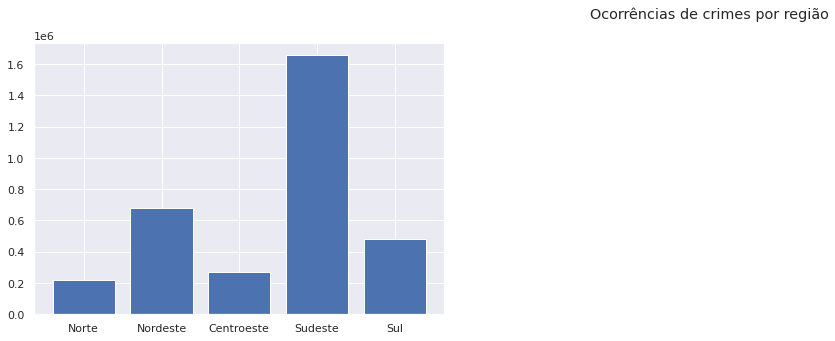

In [ ]:
names = ['Norte', 'Nordeste', 'Centroeste', 'Sudeste', 'Sul']
values = [220564,676367,270475,1654594,479097]

plt.figure(figsize=(25, 5))

plt.subplot(131)
plt.bar(names, values)

plt.suptitle('Ocorrências de crimes por região')
plt.show()



*   Função de normalização de valores por min max
*   Normalização por z-score



In [ ]:
def normalizacao(valores):
  arr = []
  for i in valores:
    arr.append( (i - min(valores) )/ (max(valores) - min(valores) ) )
  return arr

def normalizacao_mean_std(valores):
  arr = []
  for i in valores:
    arr.append( (i - np.mean(valores) )/ (np.std(valores) ) )
  return arr

In [ ]:
df_normalizado = df1
df_normalizado['Ocorrencias'] = normalizacao(df1['Ocorrencias'])

In [ ]:
print(df_normalizado.loc[filter_norte, ['Ocorrencias']].sum())
print(df_normalizado.loc[filter_nordeste, ['Ocorrencias']].sum())
print(df_normalizado.loc[filter_centroeste, ['Ocorrencias']].sum())
print(df_normalizado.loc[filter_sudeste, ['Ocorrencias']].sum())
print(df_normalizado.loc[filter_sul, ['Ocorrencias']].sum())

Ocorrencias    22.342382
dtype: float64
Ocorrencias    68.513675
dtype: float64
Ocorrencias    27.398197
dtype: float64
Ocorrencias    167.604741
dtype: float64
Ocorrencias    48.530895
dtype: float64


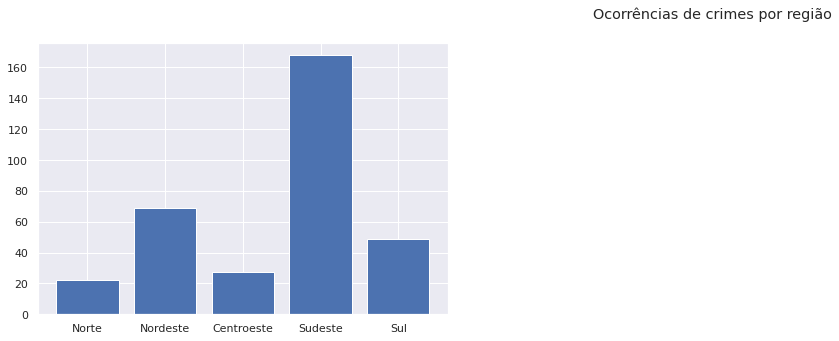

In [ ]:
names = ['Norte', 'Nordeste', 'Centroeste', 'Sudeste', 'Sul']
values = [22.342382, 68.513675, 27.398197, 167.604741, 48.530895]

plt.figure(figsize=(25, 5))

plt.subplot(131)
plt.bar(names, values)

plt.suptitle('Ocorrências de crimes por região')
plt.show()

#Vítimas - JSON

* Importando o arquivo das Vitimas, diretamente do CloudStorage

In [11]:
import os
from google.cloud import storage
serviceaccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = serviceaccount
df2 = pd.read_json('gs://data_lake_ingest_data/1_input/VitimasUF.json')
df2

,UF,Tipo Crime,Ano,Mês,Sexo da Vítima,Vítimas
0,Acre,Homicídio doloso,2021,janeiro,Feminino,1
1,Acre,Homicídio doloso,2021,janeiro,Masculino,13
2,Acre,Homicídio doloso,2021,janeiro,Sexo NI,0
3,Acre,Homicídio doloso,2021,fevereiro,Feminino,4
4,Acre,Homicídio doloso,2021,fevereiro,Masculino,12
...,...,...,...,...,...,...
15740,Tocantins,Roubo seguido de morte (latrocínio),2015,junho,Masculino,1
15741,Tocantins,Roubo seguido de morte (latrocínio),2015,julho,Masculino,1
15742,Tocantins,Roubo seguido de morte (latrocínio),2015,agosto,Masculino,1
15743,Tocantins,Roubo seguido de morte (latrocínio),2015,outubro,Masculino,2


* Verificando os 5 primeiros dados

In [ ]:
df2.head()

,UF,Tipo Crime,Ano,Mês,Sexo da Vítima,Vítimas
0,Acre,Homicídio doloso,2021,janeiro,Feminino,1
1,Acre,Homicídio doloso,2021,janeiro,Masculino,13
2,Acre,Homicídio doloso,2021,janeiro,Sexo NI,0
3,Acre,Homicídio doloso,2021,fevereiro,Feminino,4
4,Acre,Homicídio doloso,2021,fevereiro,Masculino,12


* Verificando os 5 ultimos dados

In [ ]:
df2.tail()

,UF,Tipo Crime,Ano,Mês,Sexo da Vítima,Vítimas
15740,Tocantins,Roubo seguido de morte (latrocínio),2015,junho,Masculino,1
15741,Tocantins,Roubo seguido de morte (latrocínio),2015,julho,Masculino,1
15742,Tocantins,Roubo seguido de morte (latrocínio),2015,agosto,Masculino,1
15743,Tocantins,Roubo seguido de morte (latrocínio),2015,outubro,Masculino,2
15744,Tocantins,Roubo seguido de morte (latrocínio),2015,dezembro,Masculino,2


* Verificando os tipos de dados de cada coluna

In [ ]:
df2.dtypes

UF                object
Tipo Crime        object
Ano                int64
Mês               object
Sexo da Vítima    object
Vítimas            int64
dtype: object

* Verificando se há numeros nulos ou notAvalaible em cada coluna

In [ ]:
df2.isnull().sum()

UF                0
Tipo Crime        0
Ano               0
Mês               0
Sexo da Vítima    0
Vítimas           0
dtype: int64

In [ ]:
df2.isna().sum()

UF                0
Tipo Crime        0
Ano               0
Mês               0
Sexo da Vítima    0
Vítimas           0
dtype: int64

* Verificando os valores unicos presentes em cada coluna para analisar se há inconsistencias

In [ ]:
sorted(pd.unique(df2['UF']))

['Acre',
 'Alagoas',
 'Amapá',
 'Amazonas',
 'Bahia',
 'Ceará',
 'Distrito Federal',
 'Espírito Santo',
 'Goiás',
 'Maranhão',
 'Mato Grosso',
 'Mato Grosso do Sul',
 'Minas Gerais',
 'Paraná',
 'Paraíba',
 'Pará',
 'Pernambuco',
 'Piauí',
 'Rio Grande do Norte',
 'Rio Grande do Sul',
 'Rio de Janeiro',
 'Rondônia',
 'Roraima',
 'Santa Catarina',
 'Sergipe',
 'São Paulo',
 'Tocantins']

In [ ]:
sorted(pd.unique(df2['Tipo Crime']))

['Homicídio doloso',
 'Lesão corporal seguida de morte',
 'Roubo seguido de morte (latrocínio)']

In [ ]:
sorted(pd.unique(df2['Ano']))

[2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [ ]:
sorted(pd.unique(df2['Mês']))

['abril',
 'agosto',
 'dezembro',
 'fevereiro',
 'janeiro',
 'julho',
 'junho',
 'maio',
 'março',
 'novembro',
 'outubro',
 'setembro']

In [ ]:
sorted(pd.unique(df2['Sexo da Vítima']))

['Feminino', 'Masculino', 'Não informado', 'Sem Informação', 'Sexo NI']

In [ ]:
sorted(pd.unique(df2['Vítimas']))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,


* Backup do DataFrame de Vitimas

In [12]:
df2_back = df2.copy()
df2_back

,UF,Tipo Crime,Ano,Mês,Sexo da Vítima,Vítimas
0,Acre,Homicídio doloso,2021,janeiro,Feminino,1
1,Acre,Homicídio doloso,2021,janeiro,Masculino,13
2,Acre,Homicídio doloso,2021,janeiro,Sexo NI,0
3,Acre,Homicídio doloso,2021,fevereiro,Feminino,4
4,Acre,Homicídio doloso,2021,fevereiro,Masculino,12
...,...,...,...,...,...,...
15740,Tocantins,Roubo seguido de morte (latrocínio),2015,junho,Masculino,1
15741,Tocantins,Roubo seguido de morte (latrocínio),2015,julho,Masculino,1
15742,Tocantins,Roubo seguido de morte (latrocínio),2015,agosto,Masculino,1
15743,Tocantins,Roubo seguido de morte (latrocínio),2015,outubro,Masculino,2


* Renomeando algumas colunas 

In [13]:
df2.rename(columns={'Tipo Crime': 'TipoCrime','Mês':'Mes','Sexo da Vítima':'SexoVitima','Vítimas':'Vitimas'},inplace=True)

* Verificamos que há 5 tipos na coluna SexoVitima, sendo 3 deles com o mesmo intuito, que é Sexo Não Indentificado, logo, realizamos uma alteração nos dados que tinham "Não informado" e "Sem informação" para apenas "Sexo NI"

In [14]:
df2['SexoVitima'] = df2['SexoVitima'].replace(["Não informado","Sem Informação"],'Sexo NI')
df2

,UF,TipoCrime,Ano,Mes,SexoVitima,Vitimas
0,Acre,Homicídio doloso,2021,janeiro,Feminino,1
1,Acre,Homicídio doloso,2021,janeiro,Masculino,13
2,Acre,Homicídio doloso,2021,janeiro,Sexo NI,0
3,Acre,Homicídio doloso,2021,fevereiro,Feminino,4
4,Acre,Homicídio doloso,2021,fevereiro,Masculino,12
...,...,...,...,...,...,...
15740,Tocantins,Roubo seguido de morte (latrocínio),2015,junho,Masculino,1
15741,Tocantins,Roubo seguido de morte (latrocínio),2015,julho,Masculino,1
15742,Tocantins,Roubo seguido de morte (latrocínio),2015,agosto,Masculino,1
15743,Tocantins,Roubo seguido de morte (latrocínio),2015,outubro,Masculino,2


In [15]:
df2.loc[df2['SexoVitima'] == 'Sexo NI']

,UF,TipoCrime,Ano,Mes,SexoVitima,Vitimas
2,Acre,Homicídio doloso,2021,janeiro,Sexo NI,0
5,Acre,Homicídio doloso,2021,fevereiro,Sexo NI,0
8,Acre,Homicídio doloso,2021,março,Sexo NI,0
11,Acre,Homicídio doloso,2021,abril,Sexo NI,0
14,Acre,Homicídio doloso,2021,maio,Sexo NI,0
...,...,...,...,...,...,...
15695,Sergipe,Roubo seguido de morte (latrocínio),2015,agosto,Sexo NI,0
15698,Sergipe,Roubo seguido de morte (latrocínio),2015,setembro,Sexo NI,0
15701,Sergipe,Roubo seguido de morte (latrocínio),2015,outubro,Sexo NI,0
15704,Sergipe,Roubo seguido de morte (latrocínio),2015,novembro,Sexo NI,0


* Excluindo as linhas com vitimas no ano de 2015

In [16]:
indice = df2.loc[df2['Ano'] == 2015].index
df2.drop(indice,axis=0,inplace=True)
df2

,UF,TipoCrime,Ano,Mes,SexoVitima,Vitimas
0,Acre,Homicídio doloso,2021,janeiro,Feminino,1
1,Acre,Homicídio doloso,2021,janeiro,Masculino,13
2,Acre,Homicídio doloso,2021,janeiro,Sexo NI,0
3,Acre,Homicídio doloso,2021,fevereiro,Feminino,4
4,Acre,Homicídio doloso,2021,fevereiro,Masculino,12
...,...,...,...,...,...,...
13429,Tocantins,Roubo seguido de morte (latrocínio),2016,maio,Masculino,1
13430,Tocantins,Roubo seguido de morte (latrocínio),2016,julho,Masculino,2
13431,Tocantins,Roubo seguido de morte (latrocínio),2016,agosto,Masculino,2
13432,Tocantins,Roubo seguido de morte (latrocínio),2016,novembro,Masculino,1


* Exportando o DataFrame de Vitimas Normalizado para o CloudStorage

In [17]:
from google.cloud import storage
import os
serviceAccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount


client = storage.Client()
bucket = client.get_bucket('data_lake_ingest_data')
    
bucket.blob('2_temp/temp_pandas_vitimas_normalizado.jl').upload_from_string(df2.to_json(orient="records", lines=True, force_ascii=False), 'text/json')

* Agrupamento (Salvo em outro DataFrame) do total de vitimas  de cada tipo de crime em cada ano, separado por Estados, pois anteriormente, os dados estão por Mês, portando, assim, temos uma visualização do total de cada tipo de crime por ano e estado. 

In [18]:
dfB= df2.groupby(['UF','Ano','TipoCrime']).sum()
dfB

Vitimas
UF        Ano  TipoCrime                                   
Acre      2016 Homicídio doloso                         354
          2017 Homicídio doloso                         232
               Lesão corporal seguida de morte            3
               Roubo seguido de morte (latrocínio)       15
          2018 Homicídio doloso                         394
...                                                     ...
Tocantins 2020 Lesão corporal seguida de morte            9
               Roubo seguido de morte (latrocínio)       16
          2021 Homicídio doloso                         180
               Lesão corporal seguida de morte            1
               Roubo seguido de morte (latrocínio)        6

[483 rows x 1 columns]

##Visualização com MatPlotLib

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
filter_ano = df2.Ano.isin([2021])

In [ ]:
df2.loc[filter_ano, ['SexoVitima','Vitimas']]

,SexoVitima,Vitimas
0,Feminino,1
1,Masculino,13
2,Sexo NI,0
3,Feminino,4
4,Masculino,12
...,...,...
1416,Masculino,2
1417,Sexo NI,0
1418,Feminino,0
1419,Masculino,1




*   Gráfico de pizza relacionando a frequência de ocorrencias por sexo



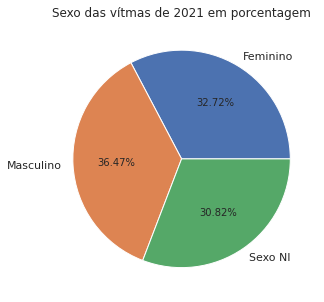

In [ ]:
import numpy as np
total_sexo_vitma=df2.groupby([df2['SexoVitima']]).size()
total_sexo_vitma.plot(kind='pie', autopct='%0.2f%%',  figsize=(5, 5), label='', 
                           title= 'Sexo das vítmas de 2021 em porcentagem')



*   Gráfico de barras de tipo de crime por ano



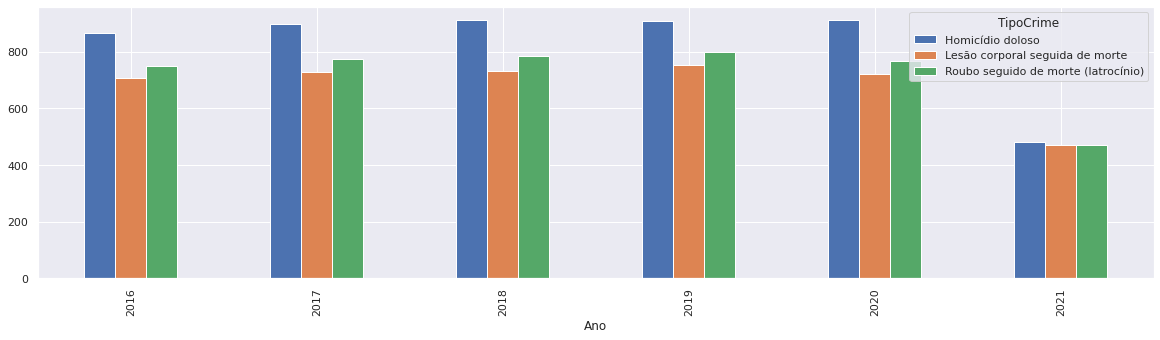

In [ ]:
tipo_crime_ano=df2.groupby([df2['TipoCrime'], 'Ano']).size()
tipo_crime_ano = tipo_crime_ano.unstack(level=0).fillna(0)
tipo_crime_ano.plot(kind='bar', figsize=(20, 5))



*   Gráfico de barras Mês por tipo de acidente



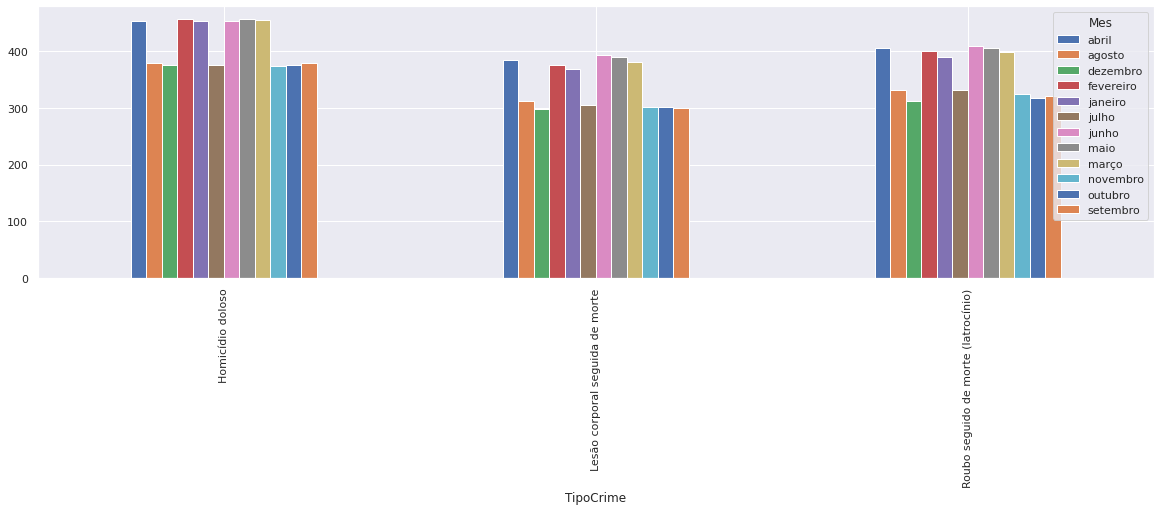

In [ ]:
tipo_crime_mes=df2.groupby([df2['Mes'], 'TipoCrime']).size()
tipo_crime_mes = tipo_crime_mes.unstack(level=0).fillna(0)
tipo_crime_mes.plot(kind='bar', figsize=(20, 5))



*   Gráfico de barras de sexo da vitima por Mês



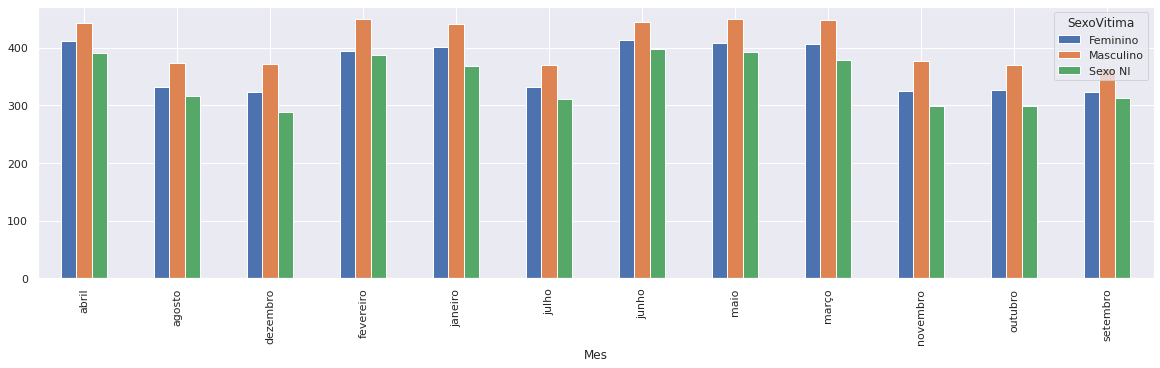

In [ ]:
tipo_crime_sexo=df2.groupby([df2['SexoVitima'], 'Mes']).size()
tipo_crime_sexo = tipo_crime_sexo.unstack(level=0).fillna(0)
tipo_crime_sexo.plot(kind='bar', figsize=(20, 5))



*   Gráfico de barras de ano por mês



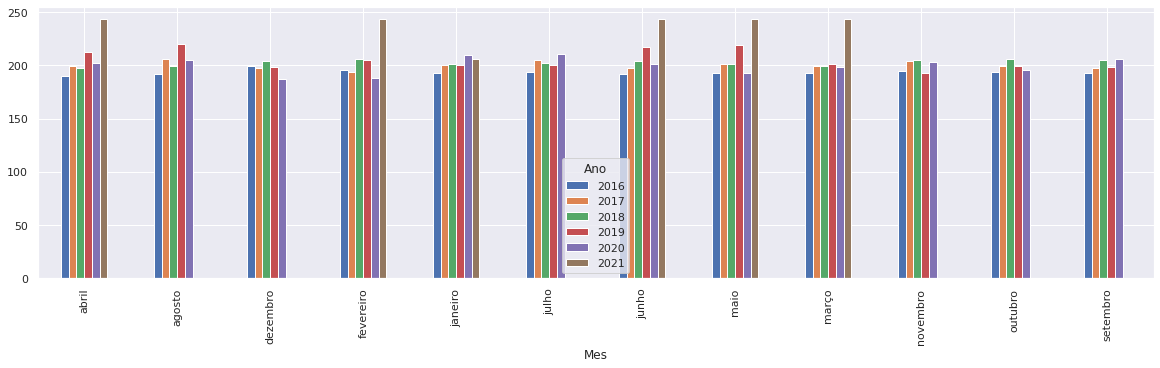

In [ ]:

ano_mes=df2.groupby([df2['Ano'], df2['Mes']]).size()
ano_mes=ano_mes.rename({1: 'Janeiro', 2: 'Fevereiro', 3: 'Maço', 4: 'Abril', 5: 'Maio', 6:'Junho', 7:'Julho', 
                        8:'Agosto', 9:'Setembro', 10:'Outubro', 11: 'Novembro', 12:'Dezembro'})
ano_mes= ano_mes.unstack(level=0).fillna(0)
ano_mes.plot(kind='bar', figsize=(20,5))



*   Gráfico de barras da frequência do tipo de crime



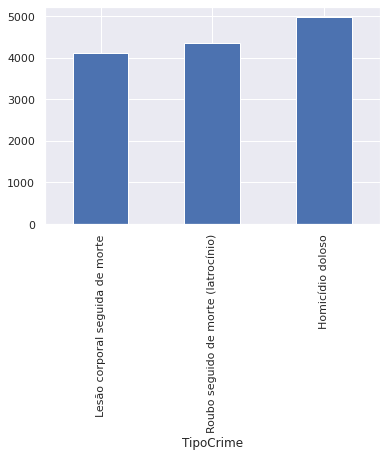

In [ ]:
df2.groupby(['TipoCrime']).TipoCrime.count().sort_values()[-10:].plot(kind='bar')



*   Gráfico de barras frequência sexo



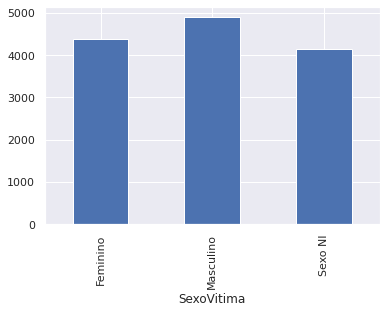

In [ ]:
df2.groupby(['SexoVitima']).SexoVitima.count()[-5:].plot(kind='bar')



*   Gráfico de barra frequência mês



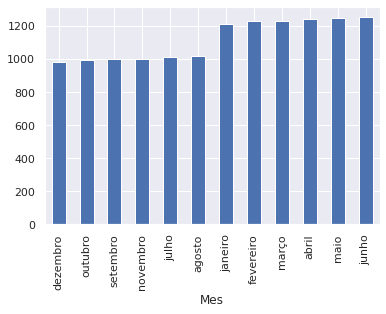

In [ ]:
df2.groupby(['Mes']).Mes.count().sort_values()[-12:].plot(kind='bar')



*   Gráfico de barras frequência ano



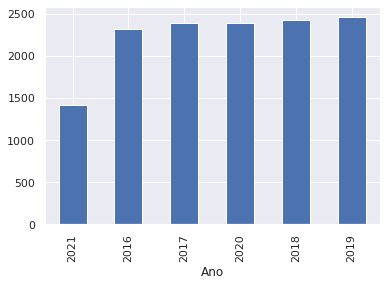

In [ ]:
df2.groupby(['Ano']).Ano.count().sort_values()[-12:].plot(kind='bar')

#DataFrame obtido com a junção 

* Realizamos a junção dos dois DataFrames obtidos por agrupamento, afim de relacionarmos a quantidade total de ocorrencias com a quantidade total de vitimas por tipo de crime, ano e por estado

In [19]:
df_Ocorrencias_Vitimas_PorAnoEstado = pd.merge(dfA, dfB, how = 'inner', on = ['UF','Ano','TipoCrime'])
df_Ocorrencias_Vitimas_PorAnoEstado 

Ocorrencias  Vitimas
UF        Ano  TipoCrime                                                
Acre      2016 Homicídio doloso                             425      354
          2017 Homicídio doloso                             221      232
               Lesão corporal seguida de morte                0        3
               Roubo seguido de morte (latrocínio)           10       15
          2018 Homicídio doloso                             396      394
...                                                         ...      ...
Tocantins 2020 Lesão corporal seguida de morte                7        9
               Roubo seguido de morte (latrocínio)           16       16
          2021 Homicídio doloso                             157      180
               Lesão corporal seguida de morte                1        1
               Roubo seguido de morte (latrocínio)            6        6

[483 rows x 2 columns]

* Verificando os 20 primeiros dados

In [ ]:
df_Ocorrencias_Vitimas_PorAnoEstado .head(20)

Ocorrencias  Vitimas
UF      Ano  TipoCrime                                                
Acre    2016 Homicídio doloso                             425      354
        2017 Homicídio doloso                             221      232
             Lesão corporal seguida de morte                0        3
             Roubo seguido de morte (latrocínio)           10       15
        2018 Homicídio doloso                             396      394
             Roubo seguido de morte (latrocínio)           20       20
        2019 Homicídio doloso                             292      298
             Lesão corporal seguida de morte                2        3
             Roubo seguido de morte (latrocínio)           14       12
        2020 Homicídio doloso                             271      273
             Lesão corporal seguida de morte                1        1
             Roubo seguido de morte (latrocínio)           11       11
        2021 Homicídio doloso                             108      110
             Lesão corporal seguida de morte                1        1
             Roubo seguido de morte (latrocínio)            4        4
Alagoas 2016 Homicídio doloso                            1659     1695
             Lesão corporal seguida de morte                9        9
             Roubo seguido de morte (latrocínio)           61       61
        2017 Homicídio doloso                            1672     1706
             Lesão corporal seguida de morte               19       19

* Verificando os 20 ultimos dados

In [ ]:
df_Ocorrencias_Vitimas_PorAnoEstado.tail(20)

Ocorrencias  Vitimas
UF        Ano  TipoCrime                                                
São Paulo 2021 Lesão corporal seguida de morte               43       42
               Roubo seguido de morte (latrocínio)           86       88
Tocantins 2016 Homicídio doloso                             417      427
               Lesão corporal seguida de morte                5        5
               Roubo seguido de morte (latrocínio)           14       14
          2017 Homicídio doloso                             337      353
               Lesão corporal seguida de morte                7        5
               Roubo seguido de morte (latrocínio)           11       12
          2018 Homicídio doloso                             363      368
               Lesão corporal seguida de morte                7        8
               Roubo seguido de morte (latrocínio)           16       17
          2019 Homicídio doloso                             301      344
               Lesão corporal seguida de morte                7        8
               Roubo seguido de morte (latrocínio)           18       29
          2020 Homicídio doloso                             367      392
               Lesão corporal seguida de morte                7        9
               Roubo seguido de morte (latrocínio)           16       16
          2021 Homicídio doloso                             157      180
               Lesão corporal seguida de morte                1        1
               Roubo seguido de morte (latrocínio)            6        6

* Exportando o DataFrame da junção para o CloudStorage

In [ ]:
from google.cloud import storage
import os
serviceAccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount


client = storage.Client()
bucket = client.get_bucket('data_lake_ingest_data')
    
bucket.blob('2_temp/temp_pandas_ocorrencia_vitimas_porAnoEstado.csv').upload_from_string(df_Ocorrencias_Vitimas_PorAnoEstado.to_csv(), 'text/csv')

#TAXA ANALFABETIZAÇÃO - CSV

* Importando o arquivo das Taxas de Analfabetização, diretamente do CloudStorage

In [ ]:
import os
from google.cloud import storage
serviceaccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = serviceaccount

df3 = pd.read_csv('gs://data_lake_ingest_data/1_input/Taxa_analfabetismo.csv',sep=',')
df3

,Unidade da Federação,Grupo de idade,2016,2017,2018,2019
0,Rondônia,15 anos ou mais,6.6,7.2,6.5,6.4
1,Acre,15 anos ou mais,13.1,12.1,12.1,11.7
2,Amazonas,15 anos ou mais,6.9,6.1,5.8,5.4
3,Roraima,15 anos ou mais,6.6,6.0,6.0,5.0
4,Pará,15 anos ou mais,9.2,8.6,8.8,8.4
5,Amapá,15 anos ou mais,5.0,5.0,6.1,5.5
6,Tocantins,15 anos ou mais,10.4,10.2,10.0,9.7
7,Maranhão,15 anos ou mais,16.7,16.8,16.3,15.6
8,Piauí,15 anos ou mais,17.2,16.6,16.6,16.0
9,Ceará,15 anos ou mais,15.2,14.2,13.3,13.6


* Verificando os 5 primeiros dados

In [ ]:
df3.head()

,Unidade da Federação,Grupo de idade,2016,2017,2018,2019
0,Rondônia,15 anos ou mais,6.6,7.2,6.5,6.4
1,Acre,15 anos ou mais,13.1,12.1,12.1,11.7
2,Amazonas,15 anos ou mais,6.9,6.1,5.8,5.4
3,Roraima,15 anos ou mais,6.6,6.0,6.0,5.0
4,Pará,15 anos ou mais,9.2,8.6,8.8,8.4


* Verificando os 5 ultimos dados

In [ ]:
df3.tail()

,Unidade da Federação,Grupo de idade,2016,2017,2018,2019
22,Rio Grande do Sul,15 anos ou mais,3.2,3.0,3.0,2.6
23,Mato Grosso do Sul,15 anos ou mais,6.3,5.0,5.0,5.1
24,Mato Grosso,15 anos ou mais,6.5,6.5,7.1,6.2
25,Goiás,15 anos ou mais,6.5,5.9,5.7,5.1
26,Distrito Federal,15 anos ou mais,2.6,2.5,3.1,2.7


* Verificando os tipos de dados de cada coluna

In [ ]:
df3.dtypes

Unidade da Federação     object
Grupo de idade           object
2016                    float64
2017                    float64
2018                    float64
2019                    float64
dtype: object

* Backup do DataFrame de taxas de analfabetização

In [ ]:
df3_back = df3.copy()
df3_back

,Unidade da Federação,Grupo de idade,2016,2017,2018,2019
0,Rondônia,15 anos ou mais,6.6,7.2,6.5,6.4
1,Acre,15 anos ou mais,13.1,12.1,12.1,11.7
2,Amazonas,15 anos ou mais,6.9,6.1,5.8,5.4
3,Roraima,15 anos ou mais,6.6,6.0,6.0,5.0
4,Pará,15 anos ou mais,9.2,8.6,8.8,8.4
5,Amapá,15 anos ou mais,5.0,5.0,6.1,5.5
6,Tocantins,15 anos ou mais,10.4,10.2,10.0,9.7
7,Maranhão,15 anos ou mais,16.7,16.8,16.3,15.6
8,Piauí,15 anos ou mais,17.2,16.6,16.6,16.0
9,Ceará,15 anos ou mais,15.2,14.2,13.3,13.6


* Verificando os elementos unicos de cada coluna para analisar se há inconsistencias

In [ ]:
pd.unique(df3['Unidade da Federação'])

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [ ]:
pd.unique(df3['Grupo de idade'])

array(['15 anos ou mais'], dtype=object)

In [ ]:
pd.unique(df3['2016'])

array([ 6.6, 13.1,  6.9,  9.2,  5. , 10.4, 16.7, 17.2, 15.2, 14.7, 16.3,
       12.8, 19.4, 13. ,  6.2,  2.7,  2.8,  4.5,  3.2,  6.3,  6.5,  2.6])

In [ ]:
pd.unique(df3['2017'])

array([ 7.2, 12.1,  6.1,  6. ,  8.6,  5. , 10.2, 16.8, 16.6, 14.2, 13.5,
       13.4, 18.3, 14.5, 12.7,  5.5,  2.5,  2.6,  4.6,  3. ,  6.5,  5.9])

In [ ]:
pd.unique(df3['2018'])

array([ 6.5, 12.1,  5.8,  6. ,  8.8,  6.1, 10. , 16.3, 16.6, 13.3, 12.9,
       16.1, 11.9, 17.2, 13.9, 12.7,  5.5,  2.4,  2.6,  5. ,  2.5,  3. ,
        7.1,  5.7,  3.1])

In [ ]:
pd.unique(df3['2019'])

array([ 6.4, 11.7,  5.4,  5. ,  8.4,  5.5,  9.7, 15.6, 16. , 13.6, 13.4,
       16.1, 11.9, 17.1, 13.5, 12.9,  5.3,  2.1,  2.6,  4.6,  2.3,  5.1,
        6.2,  2.7])

* Renomeando as colunas 

In [ ]:
df3.rename(columns = {'Unidade da Federação' : 'UF','Grupo de idade':'Grupo_idade','2016':'TaxaAnalfabetismo2016','2017':'TaxaAnalfabetismo2017','2018':'TaxaAnalfabetismo2018','2019':'TaxaAnalfabetismo2019'},inplace=True)
df3

,UF,Grupo_idade,TaxaAnalfabetismo2016,TaxaAnalfabetismo2017,TaxaAnalfabetismo2018,TaxaAnalfabetismo2019
0,Rondônia,15 anos ou mais,6.6,7.2,6.5,6.4
1,Acre,15 anos ou mais,13.1,12.1,12.1,11.7
2,Amazonas,15 anos ou mais,6.9,6.1,5.8,5.4
3,Roraima,15 anos ou mais,6.6,6.0,6.0,5.0
4,Pará,15 anos ou mais,9.2,8.6,8.8,8.4
5,Amapá,15 anos ou mais,5.0,5.0,6.1,5.5
6,Tocantins,15 anos ou mais,10.4,10.2,10.0,9.7
7,Maranhão,15 anos ou mais,16.7,16.8,16.3,15.6
8,Piauí,15 anos ou mais,17.2,16.6,16.6,16.0
9,Ceará,15 anos ou mais,15.2,14.2,13.3,13.6


* Exportando o DataFramd e Taxa de Analfabetismo Normalizado para o CloudStorage

In [ ]:
from google.cloud import storage
import os
serviceAccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount


client = storage.Client()
bucket = client.get_bucket('data_lake_ingest_data')
    
bucket.blob('2_temp/temp_pandas_taxa_analfabetismo_normalizado.csv').upload_from_string(df3.to_csv(), 'text/csv')

# Estimativa populacional 2016-2021

In [ ]:
import os
from google.cloud import storage
serviceaccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = serviceaccount

df_pop = pd.read_csv('gs://data_lake_ingest_data/1_input/estimativa_pop_2016_2021.csv',sep=',')
df_pop

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA,ANO
0,AC,12,13,Acrelândia,14.120,2016
1,AC,12,54,Assis Brasil,6.863,2016
2,AC,12,104,Brasiléia,24.311,2016
3,AC,12,138,Bujari,9.503,2016
4,AC,12,179,Capixaba,10.820,2016
...,...,...,...,...,...,...
33415,TO,17,21208,Tocantinópolis,22.870,2019
33416,TO,17,21257,Tupirama,1.891,2019
33417,TO,17,21307,Tupiratins,2.671,2019
33418,TO,17,22081,Wanderlândia,11.683,2019


In [ ]:
df_pop.dtypes

UF                    object
COD. UF                int64
COD. MUNIC             int64
NOME DO MUNICÍPIO     object
POPULAÇÃO ESTIMADA    object
ANO                    int64
dtype: object

In [ ]:
def alter_num(col):
  novo = []
  for row in col:
    row = row.replace(".","")
    row = row.replace("(1)","")
    row = row.replace("(2)","")
    row = row.replace("(3)","")
    row = row.replace("(4)","")
    row = row.replace("(5)","")
    row = row.replace("(6)","")
    row = row.replace("(7)","")
    row = row.replace("(8)","")
    row = row.replace("(9)","")
    row = row.replace("(10)","")
    row = row.replace("(11)","")
    row = row.replace("(12)","")
    row = row.replace("(13)","")
    row = row.replace("(14)","")
    row = row.replace("(15)","")
    row = row.replace("(16)","")
    row = row.replace("(17)","")
    row = row.replace("(18)","")
    row = row.replace("(19)","")
    row = row.replace("(20)","")
    novo.append(row)
  return novo

In [ ]:
df_pop.ANO.unique()

array([2016, 2017, 2021, 2020, 2018, 2019])

In [ ]:
df_pop['POPULAÇÃO ESTIMADA'] = alter_num(df_pop['POPULAÇÃO ESTIMADA'])

In [ ]:
df_pop['POPULAÇÃO ESTIMADA'] = pd.to_numeric(df_pop['POPULAÇÃO ESTIMADA'])

In [ ]:
df_pop.dtypes

UF                    object
COD. UF                int64
COD. MUNIC             int64
NOME DO MUNICÍPIO     object
POPULAÇÃO ESTIMADA     int64
ANO                    int64
dtype: object

In [ ]:
df_pop_new = df_pop.drop(columns=['COD. UF', 'COD. MUNIC'])

In [ ]:
df_pop_new.head()

,UF,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA,ANO
0,AC,Acrelândia,14120,2016
1,AC,Assis Brasil,6863,2016
2,AC,Brasiléia,24311,2016
3,AC,Bujari,9503,2016
4,AC,Capixaba,10820,2016


In [ ]:
df_pop_new = df_pop_new.rename(columns={'NOME DO MUNICÍPIO': 'nome_municipio', 'POPULAÇÃO ESTIMADA': 'populacao_estimada'})

In [ ]:
df_pop_new.head()

,UF,nome_municipio,populacao_estimada,ANO
0,AC,Acrelândia,14120,2016
1,AC,Assis Brasil,6863,2016
2,AC,Brasiléia,24311,2016
3,AC,Bujari,9503,2016
4,AC,Capixaba,10820,2016


In [ ]:
arr_estados = df_pop_new.UF.unique()

arr_estados

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [ ]:
def total_pop_ano_estado(ano):
  arr_total_pop_estado = []
  filter_ano = df_pop_new.ANO == ano
  for i in arr_estados:
    filter_estados = df_pop_new.UF == i
    df_pop_est = df_pop_new.loc[filter_estados & filter_ano]
    #print(i)
    #print(df_pop_est['populacao_estimada'].sum())
    #print("=====================================================")
    arr_total_pop_estado.append(df_pop_est['populacao_estimada'].sum())
  return arr_total_pop_estado

In [ ]:
total_pop_ano_estado(2016)

[816687,
 3358963,
 4001667,
 782295,
 15276566,
 8963663,
 2977216,
 3973697,
 6695855,
 6954036,
 20997560,
 2682386,
 3305531,
 8305359,
 3999415,
 9410336,
 3212180,
 11242720,
 16635996,
 3474998,
 1787279,
 514229,
 11286500,
 6910553,
 2265779,
 44749699,
 1532902]

In [ ]:
filter_anoo = df_pop_new.ANO == 2016

In [ ]:
df_pop_est = df_pop_est.drop(columns=['nome_municipio'])

In [ ]:
df_pop_est = df_pop_new.loc[filter_anoo]

In [ ]:
df_pop_por_ano_estado = df_pop_est.groupby(by=["UF",'ANO']).sum()

In [ ]:
df_finalizado_pop = pd.DataFrame(data=df_pop_por_ano_estado)

In [ ]:
data_2016 = {'UF': arr_estados, 'populacao_estimada': total_pop_ano_estado(2016), 'Ano': 2016}
df_pop_2016 = pd.DataFrame(data=data_2016)
df_pop_2016

,UF,populacao_estimada,Ano
0,AC,816687,2016
1,AL,3358963,2016
2,AM,4001667,2016
3,AP,782295,2016
4,BA,15276566,2016
5,CE,8963663,2016
6,DF,2977216,2016
7,ES,3973697,2016
8,GO,6695855,2016
9,MA,6954036,2016


In [ ]:
data_2017 = {'UF': arr_estados, 'populacao_estimada': total_pop_ano_estado(2017), 'Ano': 2017}
df_pop_2017 = pd.DataFrame(data=data_2017)
df_pop_2017

,UF,populacao_estimada,Ano
0,AC,829619,2017
1,AL,3375823,2017
2,AM,4063614,2017
3,AP,797722,2017
4,BA,15344447,2017
5,CE,9020460,2017
6,DF,3039444,2017
7,ES,4016356,2017
8,GO,6778772,2017
9,MA,7000229,2017


In [ ]:
data_2018 = {'UF': arr_estados, 'populacao_estimada': total_pop_ano_estado(2018), 'Ano': 2018}
df_pop_2018 = pd.DataFrame(data=data_2018)
df_pop_2018

,UF,populacao_estimada,Ano
0,AC,869265,2018
1,AL,3322820,2018
2,AM,4080611,2018
3,AP,829494,2018
4,BA,14812617,2018
5,CE,9075649,2018
6,DF,2974703,2018
7,ES,3972388,2018
8,GO,6921161,2018
9,MA,7035055,2018


In [ ]:
data_2019 = {'UF': arr_estados, 'populacao_estimada': total_pop_ano_estado(2019), 'Ano': 2019}
df_pop_2019 = pd.DataFrame(data=data_2019)
df_pop_2019

,UF,populacao_estimada,Ano
0,AC,881935,2019
1,AL,3337357,2019
2,AM,4144597,2019
3,AP,845731,2019
4,BA,14873064,2019
5,CE,9132078,2019
6,DF,3015268,2019
7,ES,4018650,2019
8,GO,7018354,2019
9,MA,7075181,2019


In [ ]:
data_2020 = {'UF': arr_estados, 'populacao_estimada': total_pop_ano_estado(2020), 'Ano': 2020}
df_pop_2020 = pd.DataFrame(data=data_2020)
df_pop_2020

,UF,populacao_estimada,Ano
0,AC,894470,2020
1,AL,3351543,2020
2,AM,4207714,2020
3,AP,861773,2020
4,BA,14930634,2020
5,CE,9187103,2020
6,DF,3055149,2020
7,ES,4064052,2020
8,GO,7113540,2020
9,MA,7114598,2020


In [ ]:
data_2021 = {'UF': arr_estados, 'populacao_estimada': total_pop_ano_estado(2021), 'Ano': 2021}
df_pop_2021 = pd.DataFrame(data=data_2021)
df_pop_2021

,UF,populacao_estimada,Ano
0,AC,906876,2021
1,AL,3365351,2021
2,AM,4269995,2021
3,AP,877613,2021
4,BA,14985284,2021
5,CE,9240580,2021
6,DF,3094325,2021
7,ES,4108508,2021
8,GO,7206589,2021
9,MA,7153262,2021


In [ ]:
df_total_pop_ano_uf = pd.concat([df_pop_2016, df_pop_2017, df_pop_2018, df_pop_2019, df_pop_2020, df_pop_2021])

In [ ]:
df_total_pop_ano_uf

,UF,populacao_estimada,Ano
0,AC,816687,2016
1,AL,3358963,2016
2,AM,4001667,2016
3,AP,782295,2016
4,BA,15276566,2016
...,...,...,...
22,RS,11466630,2021
23,SC,7338473,2021
24,SE,2338474,2021
25,SP,46649132,2021


In [ ]:
from google.cloud import storage
import os
serviceAccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount


client = storage.Client()
bucket = client.get_bucket('data_lake_ingest_data')
    
bucket.blob('2_temp/temp_pandas_total_pop_ano_uf.csv').upload_from_string(df_total_pop_ano_uf.to_csv(), 'text/csv')

Taxa de desemprego - xlsx

In [ ]:
import os
from google.cloud import storage
serviceaccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = serviceaccount

df_des = pd.read_excel('gs://data_lake_ingest_data/1_input/desocupados_ajustado.xlsx')
df_des

,UF,2016_01,2016_02,2016_03,2016_04,2017_01,2017_02,2017_03,2017_04,2018_01,2018_02,2018_03,2018_04,2019_01,2019_02,2019_03,2019_04,2020_01,2020_02,2020_03,2020_04,2021_01,2021_02
0,Rondônia,7.5,7.8,8.5,7.9,8.1,9.0,8.1,7.7,10.4,8.2,8.6,9.0,8.9,6.7,8.2,8.0,8.4,10.6,11.4,11.3,11.4,10.1
1,Acre,8.7,11.0,12.1,11.7,15.9,14.9,13.5,12.2,14.4,13.5,13.1,13.1,18.0,13.6,12.8,13.6,13.5,14.2,17.1,15.5,16.8,15.9
2,Amazonas,12.7,13.2,13.6,14.8,17.7,15.5,16.0,13.5,13.9,14.2,13.1,14.4,15.9,13.9,13.3,12.9,14.5,16.5,16.6,15.5,17.5,15.6
3,Roraima,8.3,8.0,9.7,9.2,10.3,10.8,8.9,9.4,10.3,11.2,13.5,14.0,15.0,14.9,15.0,14.8,16.5,16.3,18.5,14.3,14.0,13.6
4,Pará,10.0,10.9,11.0,12.7,13.8,11.4,11.1,10.7,12.2,11.2,10.9,10.2,11.5,11.2,11.2,9.2,10.6,9.1,10.9,10.8,13.7,13.3
5,Amapá,14.3,15.8,14.9,16.8,18.5,17.1,16.6,18.7,21.5,21.3,18.3,19.6,20.2,16.9,16.7,15.6,17.2,11.4,15.2,15.8,15.4,16.4
6,Tocantins,10.7,11.2,10.8,13.1,12.6,11.7,11.8,10.5,11.0,11.3,9.8,10.4,12.3,11.4,10.5,9.1,11.2,12.6,12.2,10.5,16.3,15.4
7,Maranhão,10.8,11.8,11.9,12.9,15.0,14.6,14.4,13.3,15.6,14.3,13.7,14.0,16.3,14.6,14.1,12.1,16.1,16.0,16.9,14.4,17.0,17.2
8,Piauí,9.6,9.9,9.4,8.8,12.6,13.5,12.0,13.3,13.2,13.3,12.3,12.3,12.7,12.8,12.7,13.0,13.7,12.7,12.8,12.0,14.5,14.9
9,Ceará,10.8,11.5,13.1,12.4,14.2,13.2,11.8,11.1,12.8,11.7,10.6,10.1,11.4,10.9,11.3,10.1,12.1,12.1,14.1,14.4,15.1,15.0


In [ ]:
df_des.dtypes

UF          object
2016_01    float64
2016_02    float64
2016_03    float64
2016_04    float64
2017_01    float64
2017_02    float64
2017_03    float64
2017_04    float64
2018_01    float64
2018_02    float64
2018_03    float64
2018_04    float64
2019_01    float64
2019_02    float64
2019_03    float64
2019_04    float64
2020_01    float64
2020_02    float64
2020_03    float64
2020_04    float64
2021_01    float64
2021_02    float64
dtype: object

In [ ]:
filter_ano = df_des.UF == 'Rondônia'

In [ ]:
df_des.loc[filter_ano][['2016_01', '2016_02', '2016_03','2016_04']]

,2016_01,2016_02,2016_03,2016_04
0,7.5,7.8,8.5,7.9


In [ ]:
def media_ano_uf(ano_01,ano_02,ano_03,ano_04,uf):
  filter_uf = df_des.UF == uf
  arr_values = []
  
  df_novo = df_des.loc[filter_uf][[ano_01, ano_02, ano_03,ano_04]]

  
  values = df_novo[ano_01].values + df_novo[ano_02].values + df_novo[ano_03].values + df_novo[ano_04].values
  
  return round(values[0]/4, 2)

In [ ]:
media_ano_uf('2016_01', '2016_02', '2016_03','2016_04','Rondônia')

7.93

In [ ]:
arr_uf = df_des.UF.unique()

In [ ]:
def arr_media_valores_ano(ano):
  arr_values = []
  for i in arr_uf:
    #print(i)
    #print(media_ano_uf('2016_01', '2016_02', '2016_03','2016_04',i))
    #print("")
    if ano == 2016:
      arr_values.append(media_ano_uf('2016_01', '2016_02', '2016_03','2016_04',i))
    elif ano == 2017:
      arr_values.append(media_ano_uf('2017_01', '2017_02', '2017_03','2017_04',i))
    elif ano == 2018:
      arr_values.append(media_ano_uf('2018_01', '2018_02', '2018_03','2018_04',i))
    elif ano == 2019:
      arr_values.append(media_ano_uf('2019_01', '2019_02', '2019_03','2019_04',i))
    elif ano == 2020:
      arr_values.append(media_ano_uf('2020_01', '2020_02', '2020_03','2020_04',i))
  return arr_values


In [ ]:
arr_media_valores_ano(2016)

[7.93,
 10.88,
 13.58,
 8.8,
 11.15,
 15.45,
 11.45,
 11.85,
 9.43,
 11.95,
 14.15,
 11.35,
 14.55,
 14.08,
 13.25,
 15.85,
 11.08,
 12.22,
 11.72,
 12.35,
 8.22,
 6.32,
 8.18,
 7.68,
 9.35,
 10.48,
 12.0]

In [ ]:
df_des = df_des.drop(columns=['2021_01','2021_02'])

In [ ]:
df_des.head()

,UF,2016_01,2016_02,2016_03,2016_04,2017_01,2017_02,2017_03,2017_04,2018_01,2018_02,2018_03,2018_04,2019_01,2019_02,2019_03,2019_04,2020_01,2020_02,2020_03,2020_04
0,Rondônia,7.5,7.8,8.5,7.9,8.1,9.0,8.1,7.7,10.4,8.2,8.6,9.0,8.9,6.7,8.2,8.0,8.4,10.6,11.4,11.3
1,Acre,8.7,11.0,12.1,11.7,15.9,14.9,13.5,12.2,14.4,13.5,13.1,13.1,18.0,13.6,12.8,13.6,13.5,14.2,17.1,15.5
2,Amazonas,12.7,13.2,13.6,14.8,17.7,15.5,16.0,13.5,13.9,14.2,13.1,14.4,15.9,13.9,13.3,12.9,14.5,16.5,16.6,15.5
3,Roraima,8.3,8.0,9.7,9.2,10.3,10.8,8.9,9.4,10.3,11.2,13.5,14.0,15.0,14.9,15.0,14.8,16.5,16.3,18.5,14.3
4,Pará,10.0,10.9,11.0,12.7,13.8,11.4,11.1,10.7,12.2,11.2,10.9,10.2,11.5,11.2,11.2,9.2,10.6,9.1,10.9,10.8


In [ ]:
data_2016 = {'UF': arr_uf, 'taxa_desempregados': arr_media_valores_ano(2016), 'Ano': 2016}
df_des_2016 = pd.DataFrame(data=data_2016)
df_des_2016

,UF,taxa_desempregados,Ano
0,Rondônia,7.93,2016
1,Acre,10.88,2016
2,Amazonas,13.58,2016
3,Roraima,8.80,2016
4,Pará,11.15,2016
5,Amapá,15.45,2016
6,Tocantins,11.45,2016
7,Maranhão,11.85,2016
8,Piauí,9.43,2016
9,Ceará,11.95,2016


In [ ]:
data_2017 = {'UF': arr_uf, 'taxa_desempregados': arr_media_valores_ano(2017), 'Ano': 2017}
df_des_2017 = pd.DataFrame(data=data_2017)
df_des_2017

,UF,taxa_desempregados,Ano
0,Rondônia,8.23,2017
1,Acre,14.12,2017
2,Amazonas,15.68,2017
3,Roraima,9.85,2017
4,Pará,11.75,2017
5,Amapá,17.73,2017
6,Tocantins,11.65,2017
7,Maranhão,14.32,2017
8,Piauí,12.85,2017
9,Ceará,12.58,2017


In [ ]:
data_2018 = {'UF': arr_uf, 'taxa_desempregados': arr_media_valores_ano(2018), 'Ano': 2018}
df_des_2018 = pd.DataFrame(data=data_2018)
df_des_2018

,UF,taxa_desempregados,Ano
0,Rondônia,9.05,2018
1,Acre,13.52,2018
2,Amazonas,13.90,2018
3,Roraima,12.25,2018
4,Pará,11.12,2018
5,Amapá,20.17,2018
6,Tocantins,10.62,2018
7,Maranhão,14.40,2018
8,Piauí,12.77,2018
9,Ceará,11.30,2018


In [ ]:
data_2019 = {'UF': arr_uf, 'taxa_desempregados': arr_media_valores_ano(2019), 'Ano': 2019}
df_des_2019 = pd.DataFrame(data=data_2019)
df_des_2019

,UF,taxa_desempregados,Ano
0,Rondônia,7.95,2019
1,Acre,14.50,2019
2,Amazonas,14.00,2019
3,Roraima,14.92,2019
4,Pará,10.77,2019
5,Amapá,17.35,2019
6,Tocantins,10.82,2019
7,Maranhão,14.28,2019
8,Piauí,12.80,2019
9,Ceará,10.92,2019


In [ ]:
df_desemprego_ano_uf = pd.concat([df_des_2016, df_des_2017, df_des_2018, df_des_2019])

In [ ]:
df_desemprego_ano_uf

,UF,taxa_desempregados,Ano
0,Rondônia,7.93,2016
1,Acre,10.88,2016
2,Amazonas,13.58,2016
3,Roraima,8.80,2016
4,Pará,11.15,2016
...,...,...,...
22,Rio Grande do Sul,8.02,2019
23,Mato Grosso do Sul,7.95,2019
24,Mato Grosso,7.95,2019
25,Goiás,10.60,2019


In [ ]:
from google.cloud import storage
import os
serviceAccount = '/content/soulcode-projeto-final-4b88bea6e07a.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount


client = storage.Client()
bucket = client.get_bucket('data_lake_ingest_data')
    
bucket.blob('2_temp/temp_df_desemprego_ano_uf').upload_from_string(df_desemprego_ano_uf.to_csv(), 'text/csv')